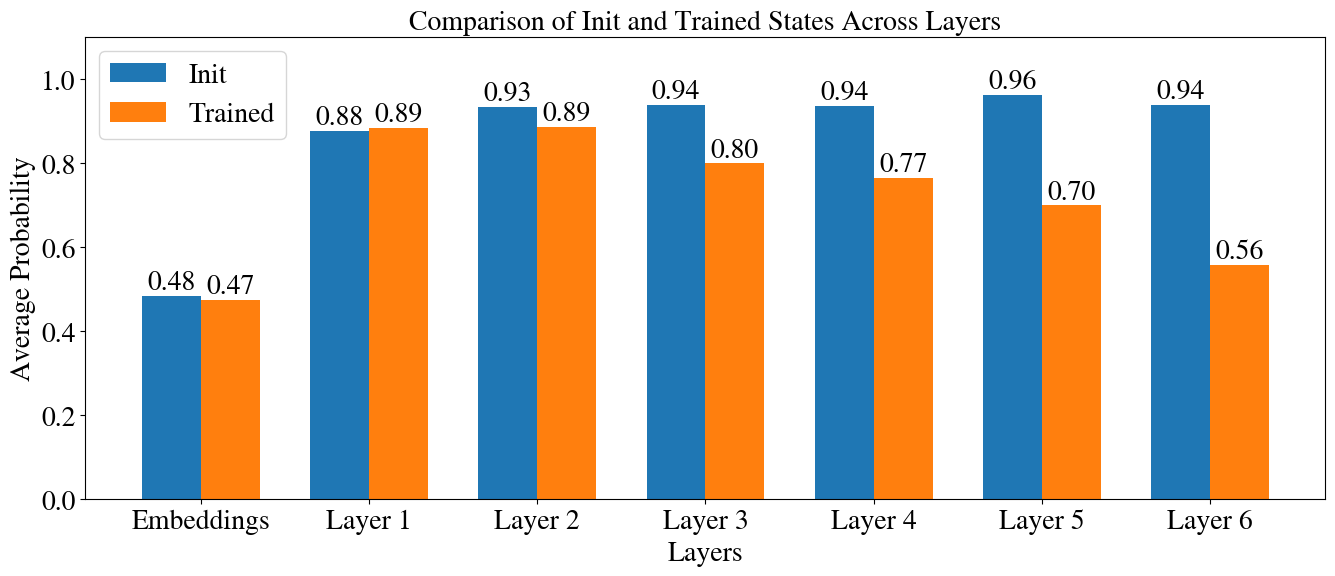

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from matplotlib import font_manager
font_path = '../timr45w.ttf'  # Update this path

# Add the font to Matplotlib's font manager
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams.update({'font.size':20})
plt.rcParams['axes.labelsize'] =20  # Axis labels
plt.rcParams['xtick.labelsize'] =20  # X-axis tick labels
plt.rcParams['ytick.labelsize'] =20  # Y-axis tick labels
plt.rcParams['legend.fontsize'] =20  # Legend
plt.rcParams['axes.titlesize'] =20  # Title

import numpy as np
import matplotlib.pyplot as plt

# Data from the table
labels = ['Embeddings', 'Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6']

import numpy as np

# Raw data from your table
# Each sub-list represents the values for a task in the format: [Embeddings, Layer 1, Layer 2, ..., Layer 6]
init_data = [
    [0.47, 0.92, 0.96, 0.96, 0.98, 0.96, 0.93],
    [0.47, 0.91, 0.96, 0.99, 0.98, 0.98, 0.94],
    [0.49, 0.78, 0.88, 0.84, 0.83, 0.95, 0.93],
    [0.51, 0.90, 0.94, 0.97, 0.96, 0.96, 0.96]
]

trained_data = [
    [0.46, 0.91, 0.91, 0.63, 0.82, 0.79, 0.54],
    [0.41, 0.87, 0.84, 0.86, 0.67, 0.58, 0.49],
    [0.51, 0.90, 0.84, 0.78, 0.75, 0.70, 0.53],
    [0.52, 0.86, 0.96, 0.93, 0.82, 0.73, 0.67]
]

# init_data = [
#     [0.48, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],  # Addition Init
#     [0.52, 0.98, 0.99, 0.99, 0.99, 0.99, 1.00],  # Ordering Init
#     [0.54, 0.97, 0.98, 0.98, 0.99, 0.98, 0.99],  # Reversal Init
#     [0.51, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00]   # Indexing Init
# ]

# trained_data = [
#     [0.49, 0.96, 0.98, 1.00, 0.99, 0.91, 0.81],  # Addition Trained
#     [0.55, 0.85, 0.99, 0.94, 0.73, 0.84, 0.77],  # Ordering Trained
#     [0.58, 0.90, 0.96, 0.99, 0.90, 0.80, 0.79],  # Reversal Trained
#     [0.57, 0.82, 0.97, 0.95, 0.87, 0.82, 0.87]   # Indexing Trained
# ]
# Convert lists to NumPy arrays for easier computation
init_array = np.array(init_data)
trained_array = np.array(trained_data)

# Calculate the average (mean) for each layer across all tasks
init_means = np.mean(init_array, axis=0)
trained_means = np.mean(trained_array, axis=0)

# Calculate the standard deviation for each layer across all tasks
init_stds = np.std(init_array, axis=0)
trained_stds = np.std(trained_array, axis=0)

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(16, 6))

# Plotting bars for Init and Trained with error bars
bars1 = plt.bar(r1, init_means, color='tab:blue', width=bar_width, capsize=5, label='Init')
bars2 = plt.bar(r2, trained_means, color='tab:orange', width=bar_width, capsize=5, label='Trained')

# Adding labels and title
plt.xlabel('Layers', fontweight='bold')
plt.ylabel('Average Probability', fontweight='bold')
plt.ylim(0, 1.1)
plt.title('Comparison of Init and Trained States Across Layers', fontweight='bold')

# Adding xticks on the middle of the bars
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)

# Adding legend
plt.legend()

# Adding numbers on top of each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.2f}', ha='center', va='bottom')

# Show plot
plt.savefig('./init_trained.pdf', format='pdf')
plt.show()



In [7]:
import numpy as np

# Raw data from your table
# Each sub-list represents the values for a task in the format: [Embeddings, Layer 1, Layer 2, ..., Layer 6]
init_data = [
    [0.47, 0.92, 0.96, 0.96, 0.98, 0.96, 0.93],
    [0.47, 0.91, 0.96, 0.99, 0.98, 0.98, 0.94],
    [0.49, 0.78, 0.88, 0.84, 0.83, 0.95, 0.93],
    [0.51, 0.90, 0.94, 0.97, 0.96, 0.96, 0.96]
]

trained_data = [
    [0.46, 0.91, 0.91, 0.63, 0.82, 0.79, 0.54],
    [0.41, 0.87, 0.84, 0.86, 0.67, 0.58, 0.49],
    [0.51, 0.90, 0.84, 0.78, 0.75, 0.70, 0.53],
    [0.52, 0.86, 0.96, 0.93, 0.82, 0.73, 0.67]
]

# Convert lists to NumPy arrays for easier computation
init_array = np.array(init_data)
trained_array = np.array(trained_data)

# Calculate the average (mean) for each layer across all tasks
init_means = np.mean(init_array, axis=0)
trained_means = np.mean(trained_array, axis=0)

# Calculate the standard deviation for each layer across all tasks
init_stds = np.std(init_array, axis=0)
trained_stds = np.std(trained_array, axis=0)

# Print the results
print("Init Means:", init_means)
print("Init STDs:", init_stds)
print("Trained Means:", trained_means)
print("Trained STDs:", trained_stds)

Init Means: [0.485  0.8775 0.935  0.94   0.9375 0.9625 0.94  ]
Init STDs: [0.01658312 0.05673403 0.03278719 0.0587367  0.06259992 0.01089725
 0.01224745]
Trained Means: [0.475  0.885  0.8875 0.8    0.765  0.7    0.5575]
Trained STDs: [0.04387482 0.02061553 0.05068284 0.11157957 0.06184658 0.07648529
 0.06759253]


torch.Size([2, 100, 64]) torch.Size([100, 1, 64])
torch.Size([2, 100, 64])


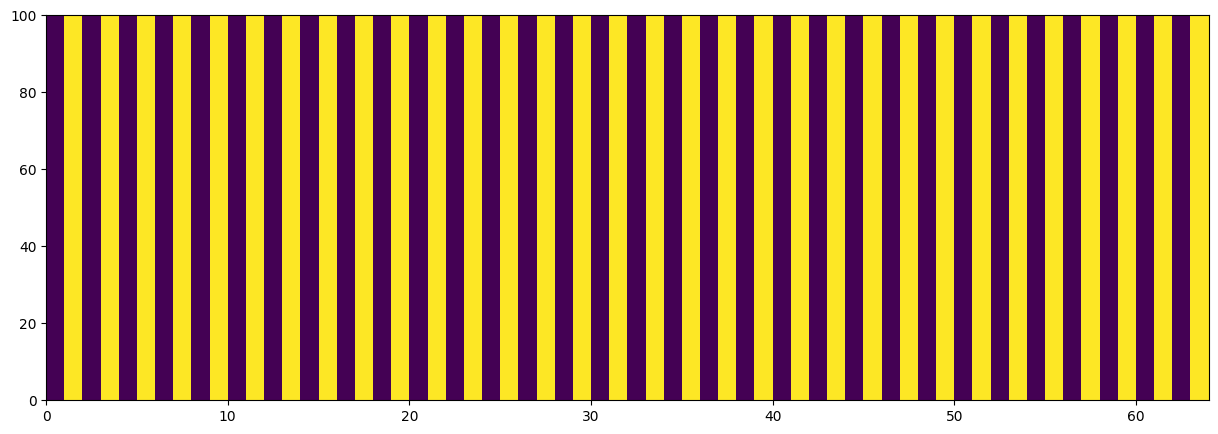

In [6]:
import torch
import math

class SinusoidalPositionalEncoding(torch.nn.Module):
    def __init__(self, dim, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        
        # Create a long enough P matrix
        pe = torch.zeros(max_len, dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, dim, 2).float() * (-math.log(10000.0) / dim))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # x.shape[0] is the sequence length
        print(x.shape, self.pe.shape)
        return x + self.pe[:x.size(0), :]

# Example usage
bs = 2
length = 100
dim = 64

# Create random tensor with shape (bs, length, dim)
# x = torch.randn(bs, length, dim)
x = torch.zeros(bs, length, dim)

# Create sinusoidal positional encoding
pos_encoding = SinusoidalPositionalEncoding(dim=dim, max_len=length)

# Apply positional encoding to x
x_pos = pos_encoding(x)
print(x_pos.shape)  # Should print torch.Size([bs, length, dim])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.pcolormesh(x_pos[0].detach().numpy(), cmap='viridis')

torch.Size([2, 100, 64])


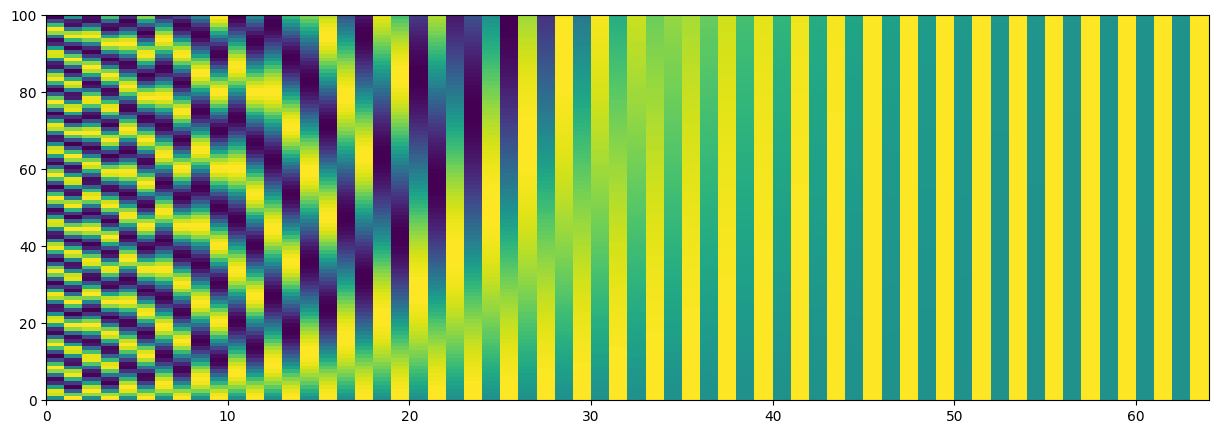

In [4]:
import torch
import math

class SinusoidalPositionalEncoding(torch.nn.Module):
    def __init__(self, dim, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        
        # Create a long enough P matrix
        pe = torch.zeros(max_len, dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, dim, 2).float() * (-math.log(10000.0) / dim))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # x.shape[1] is the sequence length
        return x + self.pe[:, :x.size(1), :]

# Example usage
bs = 2
length = 100
dim = 64

# Create random tensor with shape (bs, length, dim)
# x = torch.randn(bs, length, dim)
x = torch.zeros(bs, length, dim)

# Create sinusoidal positional encoding
pos_encoding = SinusoidalPositionalEncoding(dim=dim, max_len=length)

# Apply positional encoding to x
x_pos = pos_encoding(x)
print(x_pos.shape)  # Should print torch.Size([bs, length, dim])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.pcolormesh(x_pos[0].detach().numpy(), cmap='viridis')

torch.Size([2, 100, 64])


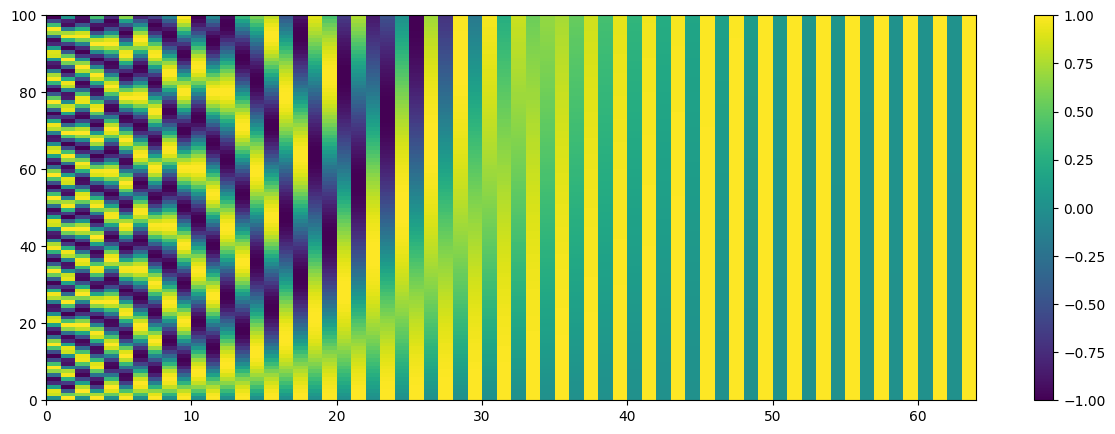

In [11]:
import torch
import torch.nn as nn
import math

class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        # Create a long enough 'pe' matrix with positional encodings
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        # Register as a buffer in PyTorch (not a parameter, but should be part of the state)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Tensor, shape [batch_size, sequence_length, embedding_dim]
        """
        # Add positional encoding to input tensor 'x'
        x = x + self.pe[:, :x.size(1), :]
        return x


# Example usage
bs = 2
length = 100
dim = 64

# Create random tensor with shape (bs, length, dim)
# x = torch.randn(bs, length, dim)
x = torch.zeros(bs, length, dim)

# Create sinusoidal positional encoding
pos_encoding = SinusoidalPositionalEncoding(dim, max_len=length)

# Apply positional encoding to x
x_pos = pos_encoding(x)
print(x_pos.shape)  # Should print torch.Size([bs, length, dim])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.pcolormesh(x_pos[0].detach().numpy(), cmap='viridis')
plt.colorbar()